In [1]:
import random

In [2]:
import matplotlib.pyplot as plt

In [3]:
def create_alphabet(words):
    alphabet = set()
    for word in words:
        for letter in word:
            alphabet.add(letter)
    return alphabet

In [4]:
def hamming_distance(s1, s2):
    return sum(c1 != c2 for c1, c2 in zip(s1, s2))

In [5]:
class Individual:
    def __init__(self, words, alphabet):
        self.alphabet = alphabet
        self.words = words
        word_size = len(words[0])
        self.code = [random.choice(list(self.alphabet)) for _ in range(word_size)]
        self.word = ''.join(self.code)
        self.hamming_distance = 0
        self.fitness = self.calcFitness()
        
    def __lt__(self, other):
        return self.fitness < other.fitness
    def __repr__(self):
        return f'{self.word}:{self.hamming_distance}'
    
    def __str__(self):
        return f'{self.word}:{self.hamming_distance}'
    
    def invert(self):
        random_index = random.randrange(len(self.code))
        self.code[random_index] = random.choice(self.alphabet)
    
    def calcFitness(self):
        self.hamming_distance = max([hamming_distance(self.word, w) for w in self.words]) 
        return 1 /  self.hamming_distance

In [6]:
def tournament_selection(population):
    TOURNAMENT_SIZE = 5
    
    bestFitness = float('-inf')
    
    index = -1
    for i in range(TOURNAMENT_SIZE):
        randomIndividual = random.randrange(len(population))
        if population[randomIndividual].fitness > bestFitness:
            bestFitness = population[randomIndividual].fitness
            index = randomIndividual
    
    return index

In [7]:
def roulette_selection(population):
  result = random.choices(range(len(population)), weights=[x.fitness for x in population], k = 1)
  return result[0]

In [8]:
def breakpoint_crossover(parent1, parent2, child1, child2):
    breakpoint = random.randrange(len(parent1.code))
    
    child1.code[:breakpoint] = parent1.code[:breakpoint]
    child2.code[:breakpoint] = parent2.code[:breakpoint]
    
    child1.code[breakpoint:] = parent2.code[breakpoint:]
    child2.code[breakpoint:] = parent1.code[breakpoint:]
    child1.word = "".join(child1.code) 
    child2.word = "".join(child2.code)    

In [9]:
def random_one_by_one_crossover(parent1, parent2, child1, child2):
    for i in range(len(parent1.code)):
        rand = random.random()
        if rand < 0.5:
            child1.code[i] = parent1.code[i]
            child2.code[i] = parent2.code[i]
        else:
            child1.code[i] = parent2.code[i]
            child2.code[i] = parent1.code[i]
    child1.word = "".join(child1.code) 
    child2.word = "".join(child2.code)          

In [10]:
def mutation(individual):
    MUTATION_PROB = 0.05
    for i in range(len(individual.code)):
        if random.random() < MUTATION_PROB:
            individual.code[i] = random.choice(list(individual.alphabet))
    individual.word = "".join(individual.code)

In [11]:
def read_instance(file_path):
    with open(file_path, 'r') as f:
        num_of_words = int(f.readline())
        _ = int(f.readline())
        _ = f.readline()
        words = []
        for _ in range(num_of_words):
            word = f.readline().strip()
            words.append(word)
        return words

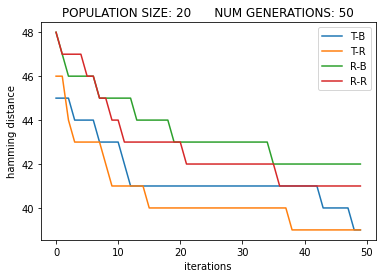

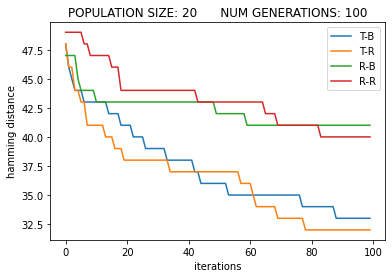

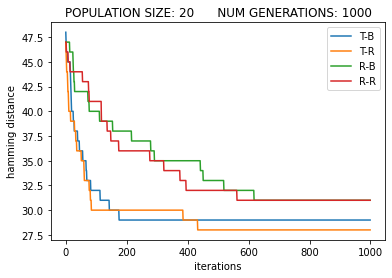

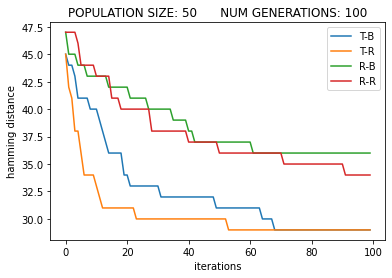

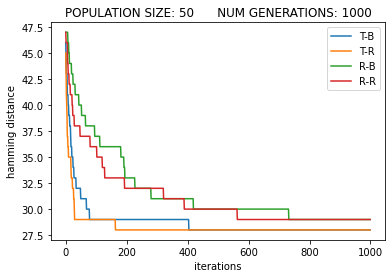

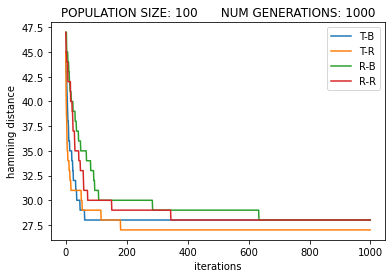

In [27]:
plt.rcParams["figure.figsize"] = (16,9)

if __name__ == '__main__':
  POPULATION_GENERATIONS = [(20, 50), (20, 100), (20, 1000), (50, 100), (50, 1000), (100, 1000)]
  words = read_instance('1.txt')
  alphabet = create_alphabet(words)
  selections = [(tournament_selection, "Tournament selection"), (roulette_selection, "Roulette selection")]
  crossovers = [(breakpoint_crossover, "Breakpoint crossover"), (random_one_by_one_crossover, "Random one by one crossover")]
  
  for POPULATION_SIZE, NUM_GENERATION in POPULATION_GENERATIONS:
    ELITISIM_SIZE = POPULATION_SIZE // 5
    for selection in selections:
      for crossover in crossovers:
        population = [Individual(words, alphabet) for _ in range(POPULATION_SIZE)]
        new_population = [Individual(words, alphabet) for _ in range(POPULATION_SIZE)]
        best_values = []

        for i in range(NUM_GENERATION):
          population.sort(reverse=True)
          new_population[:ELITISIM_SIZE] = population[:ELITISIM_SIZE]
          for j in range(ELITISIM_SIZE, POPULATION_SIZE, 2):
              p1_index = selection[0](population)
              p2_index = selection[0](population)
              
              crossover[0](population[p1_index], population[p2_index], new_population[j], new_population[j+1])
              
              mutation(new_population[j])
              mutation(new_population[j+1])
              
              new_population[j].fitness = new_population[j].calcFitness()
              new_population[j+1].fitness = new_population[j+1].calcFitness()
              
          population = new_population
          best_values.append(max(population).hamming_distance)
        bestIndividual = max(population)

        plt.plot(list(range(NUM_GENERATION)), best_values, label=f'{selection[1]}-{crossover[1]}')
              
    plt.xlabel('iterations')
    plt.ylabel('hamming distance')


    plt.title(f'POPULATION SIZE: {POPULATION_SIZE}      NUM GENERATIONS: {NUM_GENERATION}')
    plt.legend()
    plt.show()